# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [2]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
from scipy.stats import ttest_ind
import seaborn as sns

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [3]:
#Loding data into dataframes
df_test = pd.read_csv('./task_1/mmlu_data/test.csv')
df_x = pd.read_csv('./task_1/lm_scores/lm_X.csv')
df_y = pd.read_csv('./task_1/lm_scores/lm_Y.csv')
df_z = pd.read_csv('./task_1/lm_scores/lm_Z.csv')

#Printing shape of each dataframe
print("Size of the test dataset: ", df_test.shape)
print("Size of the X dataset: ", df_x.shape)
print("Size of the Y dataset: ", df_y.shape)
print("Size of the Z dataset: ", df_z.shape)

Size of the test dataset:  (14042, 8)
Size of the X dataset:  (13882, 2)
Size of the Y dataset:  (13978, 2)
Size of the Z dataset:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [4]:
# A
# Values for the result column in the X dataset
unique_values_x = df_x['result'].value_counts(dropna=False)
unique_values_x[0:20]

result
A                                                                                                     2733
A                                                                                                     1657
B                                                                                                     1412
Answer: A                                                                                             1398
C                                                                                                     1134
D                                                                                                     1124
B                                                                                                      793
Answer: B                                                                                              760
C                                                                                                      622
Answer: D                     

In [5]:
# Values for the result column in the Y dataset
unique_values_y = df_y['result'].value_counts(dropna=False)
print(unique_values_y[0:20])

result
D                                                                                                                                                                                                                                                                     2894
Answer: D                                                                                                                                                                                                                                                             1718
C                                                                                                                                                                                                                                                                     1701
B                                                                                                                                                                                               

In [6]:
# Values for the result column in the Z dataset
unique_values_z = df_z['result'].value_counts(dropna=False)
print(unique_values_z[0:20])

result
D                                           2257
C                                           2191
B                                           2127
A                                           2060
Answer: D                                    777
Answer: C                                    748
Answer: B                                    712
Answer: A                                    687
NaN                                          345
C                                            316
D                                            314
B                                            285
A                                            279
Not Sure                                     125
None of the above                            119
Not wrong, Not wrong, so the answer is D      10
Wrong, Not wrong, so the answer is B           9
Wrong, Wrong, so the answer is A               9
Not wrong, Wrong, so the answer is C           8
all of the above, so the answer is D           2
Name: count, 

B. 
We can see many different type of answers : 

- "A","B","C" or "D" (expected type)

- "A "/"B "/"C "/"D ", with an extra space

- "Answer: A/B/C/D"

- "(justification) , so the anser is A/B/C/D"

- "None of the above"

- "Not sure"

- "Nan"



### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [7]:
# A
# Deep copy of rows of data frames where values in 'result' column have fewer than 10 characters
df_x2 = df_x[df_x['result'].apply(lambda x: len(str(x)) < 10)].copy()
df_y2 = df_y[df_y['result'].apply(lambda x: len(str(x)) < 10)].copy()
df_z2 = df_z[df_z['result'].apply(lambda x: len(str(x)) < 10)].copy()

In [8]:
# B

#Function which removes specified pattern from string s and any whitespaces
def clean_answer(s,pattern = "Answer: "):
    return str(s).replace(pattern, "").strip()

df_x2['result'] = df_x2['result'].apply(clean_answer)
df_y2['result'] = df_y2['result'].apply(clean_answer)
df_z2['result'] = df_z2['result'].apply(clean_answer)


#Removing values nan and "not sure"
df_x2 = df_x2[df_x2['result'].apply(lambda x: str(x) in ['A','B','C','D'])]
df_y2 = df_y2[df_y2['result'].apply(lambda x: str(x) in ['A','B','C','D'])]
df_z2 = df_z2[df_z2['result'].apply(lambda x: str(x) in ['A','B','C','D'])]

In [9]:
#Printing cleaned 'results' for all models to meake sure they are clean
df_x2['result'].value_counts()

result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64

In [10]:
df_y2['result'].value_counts()

result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64

In [11]:
df_z2['result'].value_counts()

result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64

In [12]:
#Comparing size of original and filtered and cleaned df
print("Size of the original x dataframe",len(df_x), "and of the filtererd x dataframe", len(df_x2))
print("Size of the original y dataframe",len(df_y), "and of the filtererd y dataframe", len(df_y2))
print("Size of the original z dataframe",len(df_z), "and of the filtererd z dataframe", len(df_z2))

Size of the original x dataframe 13882 and of the filtererd x dataframe 13436
Size of the original y dataframe 13978 and of the filtererd y dataframe 13551
Size of the original z dataframe 13923 and of the filtererd z dataframe 12753


C. /Discuss:/ 

Samples sizes are now more uneaven for the 3 different models X,Y and Z. Language model Z answerd more in a unstandardized way, so we lost more data for model Z. Additionally, the question which have been answered in a standarized way can be different for different models. This could cause some models to have less data for certain subjects or types of questions. This would be a problem as this means the data can be even more unbalanced.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [13]:
# A
#Merging df with inner join on column 'question_id'
df_test_x = pd.merge(df_test, df_x2, on='question_id')
df_test_y = pd.merge(df_test, df_y2, on='question_id')
df_test_z = pd.merge(df_test, df_z2, on='question_id')

In [14]:
# B
#Creating new column 'correct' where True means the result was the correct answer
df_test_x['correct'] = df_test_x['result'] == df_test_x['answer']
df_test_y['correct'] = df_test_y['result'] == df_test_y['answer']
df_test_z['correct'] = df_test_z['result'] == df_test_z['answer']

print("Accuracy of the model X: ", df_test_x['correct'].mean())
print("Accuracy of the model Y: ", df_test_y['correct'].mean())
print("Accuracy of the model Z: ", df_test_z['correct'].mean())


Accuracy of the model X:  0.7674903245013397
Accuracy of the model Y:  0.7458490148328537
Accuracy of the model Z:  0.663294911001333


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [15]:
df_sum = pd.DataFrame()
df_sum['result_x']= df_test_x.groupby('subject')[['result']].count()
df_sum['result_y']= df_test_y.groupby('subject')[['result']].count()
df_sum['result_z']= df_test_z.groupby('subject')[['result']].count()

#Calculating subjects with larger than 10% difference in the amount of data 
mask = (df_sum.max(axis=1) - df_sum.min(axis=1))/df_sum.min(axis=1) > 0.10
df_diff = df_sum[mask].copy(deep = True)

subject_list = df_diff.index

for subject in subject_list:
    print(subject)

college chemistry
college computer science
computer security
formal logic
high school geography
logical fallacies
medical genetics
moral disputes
moral scenarios


In [16]:
# B

Oversampling is a resonable way to balance out the dataset. This will be done by using Random oversampling, which is a method that randomly selects datapoints from the categories with less data and duplicates them in the data set. This is done with replacement and will be done so that the classes which have more than 10% imbalance are perfectly balanced. 

Random oversampling was choosen so that we do not have to remove any data from the dataset and cause more skewness in the amount of data within each category, since some of the subjects already have quite few data points. 

In [17]:
#Calculating the number of data points to oversample
df_diff['diff_x'] = df_sum.max(axis=1) - df_diff['result_x'] 
df_diff['diff_y'] = df_sum.max(axis=1) - df_diff['result_y']
df_diff['diff_z'] = df_sum.max(axis=1) - df_diff['result_z']

print(df_diff)

                          result_x  result_y  result_z  diff_x  diff_y  diff_z
subject                                                                       
college chemistry               96        98        84     2.0     0.0    14.0
college computer science        97        98        84     1.0     0.0    14.0
computer security               95        98        87     3.0     0.0    11.0
formal logic                   109       123       113    14.0     0.0    10.0
high school geography          195       193       176     0.0     2.0    19.0
logical fallacies              154       136       147     0.0    18.0     7.0
medical genetics                97        98        89     1.0     0.0     9.0
moral disputes                 329       304       250     0.0    25.0    79.0
moral scenarios                737       865       774   128.0     0.0    91.0


In [18]:
def random_resampling(df_model, subject_list, n_resamples):
    """
    Random resampling of data in df_model with subjects in subject_list
    Number of samples specified in n_resamples
    """
    #Deep copy of df_model
    df_new = df_model.copy() 

    #Iterating through subjects to resample
    for i, subject in enumerate(subject_list):
        n_resample = int(n_resamples.iloc[i])

        if n_resample > 0:
            #Extracting indecies in df_model within specific subject
            index = np.where(df_model['subject'] == subject)[0]

            #Selecting random indicies with replacement to duplicate
            resample_index = np.random.choice(index, size = n_resample, replace=True)

            #Extracting data to resample from df_model using indicies
            df_temp = df_model.iloc[resample_index]

            df_new = pd.concat([df_new, df_temp], ignore_index=True)

    return df_new



In [19]:
np.random.seed(10)
df_resampled_x = random_resampling(df_test_x, subject_list, df_diff['diff_x'])
df_resampled_y = random_resampling(df_test_y, subject_list, df_diff['diff_y'])
df_resampled_z = random_resampling(df_test_z, subject_list, df_diff['diff_z'])

In [20]:
"""
Calculating subjects with more than 10% difference again to see results after resampling
The expected output is an empty dataframe
"""
df_sum_2 = pd.DataFrame()
df_sum_2['result_x'] = df_resampled_x.groupby('subject')[['result']].count()
df_sum_2['result_y'] = df_resampled_y.groupby('subject')[['result']].count()
df_sum_2['result_z'] = df_resampled_z.groupby('subject')[['result']].count()

mask_2 = (df_sum_2.max(axis=1) - df_sum_2.min(axis=1))/df_sum_2.min(axis=1) > 0.10
df_diff_2 = df_sum_2[mask_2].copy(deep = True)

print(df_diff_2)

Empty DataFrame
Columns: [result_x, result_y, result_z]
Index: []


In [21]:
#Printing accuracy on resampled data
resampled_score_x = df_resampled_x['correct'].mean()
resampled_score_y = df_resampled_y['correct'].mean()
resampled_score_z = df_resampled_z['correct'].mean()

print(f"Accuracy of model X: {resampled_score_x}\n"
      f"Accuracy of model Y: {resampled_score_y}\n"
      f"Accuracy of model Z: {resampled_score_z}\n")

Accuracy of model X: 0.768052999631947
Accuracy of model Y: 0.7459546925566343
Accuracy of model Z: 0.6621050203736449



The accuracy of the dataset did not noticably change after resampling subjects with more than 10% difference in number the number of data ponits.

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [22]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

In [23]:
# print num rows in mmlu
print(len(df_mmlu))

# print num rows in other
print(len(df_other))

35088
11277


### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [24]:
#A

#Function for calculating statistics for task A and B
def calc_stat_df(df):
    '''
    Function which calculates mean, standard error and lower and upper limit of the 95% CI 
    for dataframe df of each model in model_name_list
    For CI normal distribution is assumed
    '''

    #Grouping by model and calculating sum, number of rows, standard deviation
    df_correct_sum = df.groupby('model_name')[['correct']].sum()
    df_correct_count = df.groupby('model_name')[['correct']].count()
    df_correct_std = df.groupby('model_name')[['correct']].std()

    #Initializing new dataframe
    df_stat = pd.DataFrame()

    #Adding statistics to new dataframe
    df_stat['mean_acc'] = df_correct_sum/df_correct_count
    df_stat['std_error'] = df_correct_std/np.sqrt(df_correct_count)

    #Calculating lower limit CI assuming normal dist
    df_stat['CI_lower'] = df_stat['mean_acc'] - 1.96*df_stat['std_error']
    #Calculating lower limit CI assuming normal dist       
    df_stat['CI_upper'] = df_stat['mean_acc'] + 1.96*df_stat['std_error']       

    return df_stat

In [25]:
df_mmlu_stat = calc_stat_df(df_mmlu)

print("On Dataset MMLU: ")
for model_name, row in df_mmlu_stat.iterrows():
    print(f"Accuracy of model {model_name}: {row['mean_acc']} with a standard error of {row['std_error']}")

On Dataset MMLU: 
Accuracy of model X: 0.7435875512995896 with a standard error of 0.004037713456574966
Accuracy of model Y: 0.7615424076607387 with a standard error of 0.003940510695325723
Accuracy of model Z: 0.6559507523939808 with a standard error of 0.004392844300172007


In [26]:
df_other_stat = calc_stat_df(df_other)

print("On Dataset MMLU: ")
for model_name, row in df_other_stat.iterrows():
    print(f"Accuracy of model {model_name}: {row['mean_acc']} with a standard error of {row['std_error']}")

On Dataset MMLU: 
Accuracy of model X: 0.787975525405693 with a standard error of 0.006667622050812713
Accuracy of model Y: 0.7209364192604416 with a standard error of 0.0073168082873388595
Accuracy of model Z: 0.6717212024474595 with a standard error of 0.007660154999876903


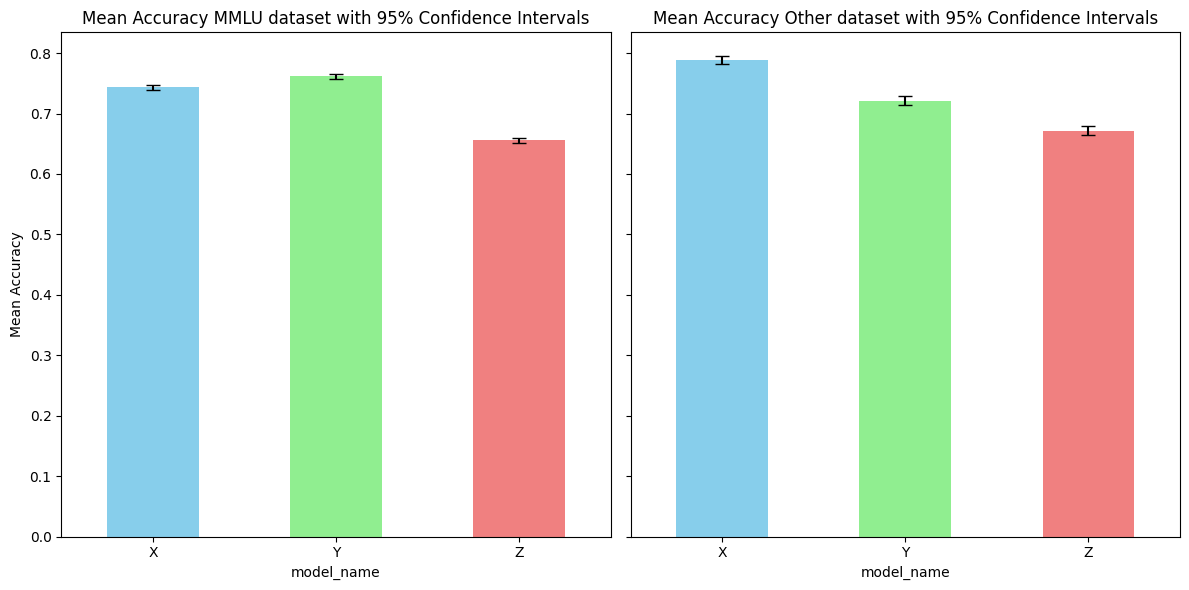

In [27]:
# B

#Initializing plot, setting sharey = True so y-axis are shared to improve visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot for MMLU dataset
df_mmlu_stat['mean_acc'].plot(kind='bar', yerr=[df_mmlu_stat['std_error'],
                             df_mmlu_stat['std_error']],capsize=5, ax=axes[0],color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0].set_ylabel('Mean Accuracy')
axes[0].set_title('Mean Accuracy MMLU dataset with 95% Confidence Intervals')
axes[0].set_xticklabels(df_mmlu_stat.index, rotation= 0)

# Plot for Other dataset
df_other_stat['mean_acc'].plot(kind='bar',yerr=[df_other_stat['std_error'], df_other_stat['std_error']],
                                capsize=5,ax=axes[1],color=['skyblue', 'lightgreen', 'lightcoral'])
axes[1].set_title('Mean Accuracy Other dataset with 95% Confidence Intervals')
axes[1].set_xticklabels(df_other_stat.index, rotation= 0)

plt.tight_layout()
plt.show()

C. /Discuss:/ 
- The model Z consistently seems to be worse performing than the others but we can not state a difference between X and Y, because it seems to depend on the data set : X performs better on Other but Y performs better on MMLU. 
- On the Other dataset, the CIs are larger. We can reasonably assume this is because the Other dataset has far fewer sample (11277) than MMLU (35088) (see code above for number of rows in each dataframe).


### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

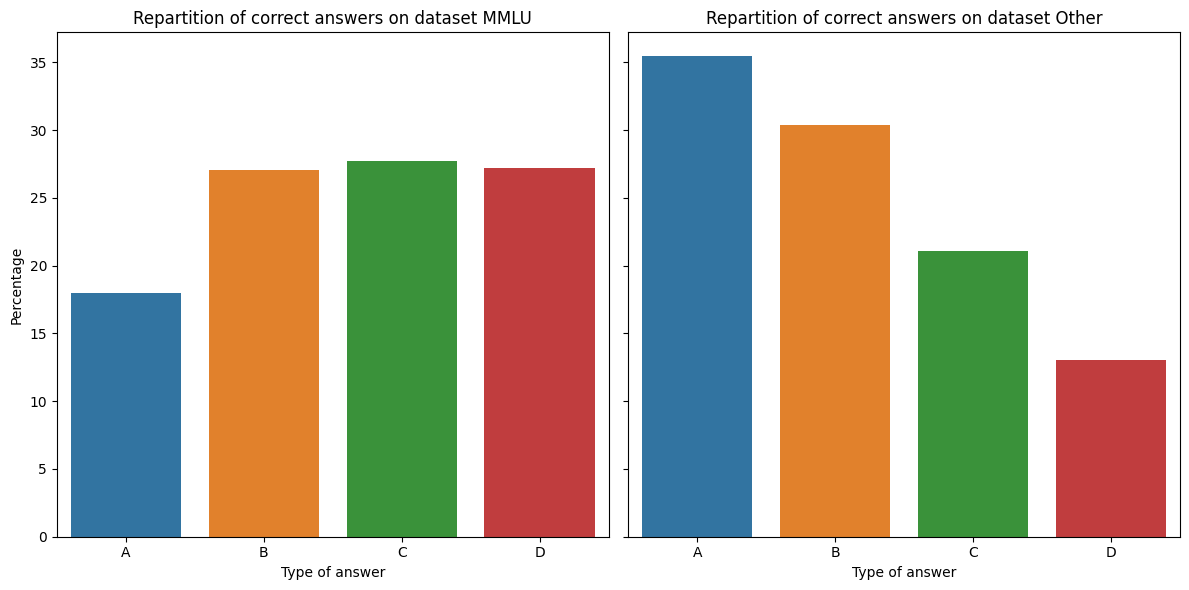

Distribution of correct answers in 2d array: [[np.int64(1611), np.int64(1078)], [np.int64(2943), np.int64(1116)], [np.int64(3403), np.int64(924)], [np.int64(3739), np.int64(641)]]


In [28]:
# A
# drop duplicates of the same question in both datasets
df_mmlu_2 = df_mmlu.drop_duplicates(subset=['question_id'])
df_other_2 = df_other.drop_duplicates(subset=['question_id'])

# Plot distribution for each dataset
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
custom_palette = {"A": "#1f77b4", "B": "#ff7f0e", "C": "#2ca02c", "D": "#d62728"}


sns.countplot(x="answer", hue="answer", data=df_mmlu_2[df_mmlu_2['correct']==True], ax=axes[0],order=['A','B','C','D'], palette=custom_palette,stat = 'percent')
axes[0].set_title("Repartition of correct answers on dataset MMLU")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Type of answer")

sns.countplot(x="answer", hue="answer", data=df_other_2[df_other_2['correct']==True], ax=axes[1],order=['A','B','C','D'], palette=custom_palette,stat = 'percent')
axes[1].set_title("Repartition of correct answers on dataset Other")
axes[1].set_ylabel("Percentage ")
axes[1].set_xlabel("Type of answer")

plt.tight_layout()

plt.show()

# Create 2d array with distribution of correct answers
# counts mmlu
mmlu_counts = df_mmlu_2['answer'].value_counts().reindex(['A', 'B', 'C', 'D'], fill_value=0)
# counts other
other_counts = df_other_2['answer'].value_counts().reindex(['A', 'B', 'C', 'D'], fill_value=0)

distribution_correct_answers = [
    [mmlu_counts['A'], other_counts['A']],
    [mmlu_counts['B'], other_counts['B']],
    [mmlu_counts['C'], other_counts['C']],
    [mmlu_counts['D'], other_counts['D']]                 
]
print("Distribution of correct answers in 2d array:", distribution_correct_answers)

### B
Null Hypothesis: there is no sigificant difference in distribution of correct answers between mmlu dataset and the other dataset

Alternative Hypothesis: there is significant difference in distribution of corect answers between mmlu dataset and the other dataset

In [29]:
# B
from scipy.stats import chi2_contingency
# perform chi2 getting chi2 statistic, p value, degrees of freedom, expected value
chi2_stat, p_val, dof, expected = chi2_contingency(distribution_correct_answers)

print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)



Chi-Square Statistic: 629.3959
P-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies:
[[2034.97534778  654.02465222]
 [3071.76085409  987.23914591]
 [3274.5772889  1052.4227111 ]
 [3314.68650922 1065.31349078]]


We can see that the P value is less than our $\alpha$ of .05, therefore we can reject the null hypothesis and accept the alternative hypothesis which suggests there is a significant difference in distribution of correct answers between the mmlu and other datasets. 

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [30]:
# A
# mmlu model X overall accuracy
modelX_mmlu_mean = df_mmlu[df_mmlu['model_name']=='X']['correct'].mean()
print("Overall model X accuracy on mmlu:", modelX_mmlu_mean)
# other model X overall accuracy
modelX_other_mean = df_other[df_other['model_name']=='X']['correct'].mean()
print("Overall model X accuracy on other:", modelX_other_mean)
print("On dataset MMLU: ")
print("")
# mmlu accuracies
print("Accuracy of X conditioned on Answer A : ", df_mmlu[(df_mmlu['model_name']=='X') & (df_mmlu['answer']== 'A')]['correct'].mean())
print("Accuracy of X conditioned on Answer B : ", df_mmlu[(df_mmlu['model_name']=='X') & (df_mmlu['answer']== 'B')]['correct'].mean())
print("Accuracy of X conditioned on Answer C : ", df_mmlu[(df_mmlu['model_name']=='X') & (df_mmlu['answer']== 'C')]['correct'].mean())
print("Accuracy of X conditioned on Answer D : ", df_mmlu[(df_mmlu['model_name']=='X') & (df_mmlu['answer']== 'D')]['correct'].mean())
print("")
print("On dataset Other: ")
print("")
# other accuracies
print("Accuracy of X conditioned on Answer A : ", df_other[(df_other['model_name']=='X') & (df_other['answer']== 'A')]['correct'].mean())
print("Accuracy of X conditioned on Answer B : ", df_other[(df_other['model_name']=='X') & (df_other['answer']== 'B')]['correct'].mean())
print("Accuracy of X conditioned on Answer C : ", df_other[(df_other['model_name']=='X') & (df_other['answer']== 'C')]['correct'].mean())
print("Accuracy of X conditioned on Answer D : ", df_other[(df_other['model_name']=='X') & (df_other['answer']== 'D')]['correct'].mean())

Overall model X accuracy on mmlu: 0.7435875512995896
Overall model X accuracy on other: 0.787975525405693
On dataset MMLU: 

Accuracy of X conditioned on Answer A :  0.9726877715704532
Accuracy of X conditioned on Answer B :  0.799184505606524
Accuracy of X conditioned on Answer C :  0.7079047898912724
Accuracy of X conditioned on Answer D :  0.6335918694838192

On dataset Other: 

Accuracy of X conditioned on Answer A :  0.974025974025974
Accuracy of X conditioned on Answer B :  0.8064516129032258
Accuracy of X conditioned on Answer C :  0.6764069264069265
Accuracy of X conditioned on Answer D :  0.6037441497659907


In [31]:
# B
# Filter for model X and correct answer is A
df_1 = df_mmlu[(df_mmlu['model_name']=='X') & (df_mmlu['answer']== 'A')]
df_2 = df_other[(df_other['model_name']=='X') & (df_other['answer']== 'A')]

# Run t test, finding t statistic, and p value
# Equal_var = False because the variance of the two groups is different (because of the findings in the chi^2 test)
t_test, p_value = stats.ttest_ind(df_1['correct'], df_2['correct'], equal_var=False)


print("T-test between the accuracy of model X conditioned on answer A on dataset MMLU vs Other: ", t_test, "with a p-value of ", p_value)


T-test between the accuracy of model X conditioned on answer A on dataset MMLU vs Other:  -0.21161116511164932 with a p-value of  0.8324287723934077


With $\alpha =0.05$ we have p-value >  $\alpha$ so we don't reject the null hypothesis, there is no significant difference between the performances of LLm model X when answer is A on dataset MMLU vs Other. 

In [32]:
# C
# Filter for mmlu model X and correct answer is A
df_A_mmlu = df_mmlu[(df_mmlu['model_name']=='X') & (df_mmlu['answer']== 'A')]
# Filter for mmlu model X and correct answer is C OR D
df_CD_mmlu = df_mmlu[(df_mmlu['model_name']=='X') & ((df_mmlu['answer']== 'C') | (df_mmlu['answer']== 'D'))]

# Filter for other model X and correct answer is A
df_A_other = df_other[(df_other['model_name']=='X') & (df_other['answer']== 'A')]
# Filter for other model X and correct answer is C OR D
df_CD_other = df_other[(df_other['model_name']=='X') & ((df_other['answer']== 'C') | (df_other['answer']== 'D'))]


# Run t test on mmlu difference, finding t statistic, and p value
# Equal_var = False because the variance of the two groups is different (because of the findings in the chi^2 test)
t_test_mmlu ,p_value_mmlu = stats.ttest_ind(df_A_mmlu['correct'], df_CD_mmlu['correct'], equal_var=False)

print("T-test between the accuracy of model X on dataset MMLU conditioned on answer A vs C or D: ", t_test_mmlu, "with a p-value of ", p_value_mmlu)

# Run t test on other difference, finding t statistic, and p value
# Equal_var = False because the variance of the two groups is different (because of the findings in the chi^2 test)
t_test_other ,p_value_other = stats.ttest_ind(df_A_other['correct'], df_CD_other['correct'], equal_var=False)

print("T-test between the accuracy of model X on dataset Other conditioned on answer A vs C or D: ", t_test_other, "with a p-value of ", p_value_other)

T-test between the accuracy of model X on dataset MMLU conditioned on answer A vs C or D:  44.05883659993774 with a p-value of  0.0
T-test between the accuracy of model X on dataset Other conditioned on answer A vs C or D:  25.13948464328854 with a p-value of  1.1880049447651482e-121


With $\alpha =0.05$ we for both the datasets, the p-value < $\alpha$ so we accept the alternative hypothesis, there is a significant difference between the performances of LLM model X when answer is A  vs  when the answer is C or D. 

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [33]:
# A
# epmpty array for storing the results
results = np.zeros((3, 4))

# iterate over all correct answer and all models for the MMLU dataset
models = ['X', 'Y', 'Z']
correct_answers = ['A', 'B', 'C', 'D']
for i,m in enumerate(models):
    for j,a in enumerate(correct_answers):
        # calculate the mean accuracy for model m and answer a
        results[i,j] = df_mmlu[(df_mmlu['model_name']==m) & (df_mmlu['answer']== a)]['correct'].mean()
df_results = pd.DataFrame(results, columns=correct_answers, index=models)
print("Mean accuracies of the dataset MMLU: ")
print(df_results)


# iterate over all correct answer and all models for the other dataset
for i,m in enumerate(models):
    for j,a in enumerate(correct_answers):
        # calculate the mean accuracy for model m and answer a
        results[i,j] = df_other[(df_other['model_name']==m) & (df_other['answer']== a)]['correct'].mean()
df_results = pd.DataFrame(results, columns=correct_answers, index=models)
print("")
print("Mean accuracies of the dataset Other: ")
print(df_results)

Mean accuracies of the dataset MMLU: 
          A         B         C         D
X  0.972688  0.799185  0.707905  0.633592
Y  0.623836  0.688073  0.733470  0.904252
Z  0.643079  0.641182  0.669115  0.661139

Mean accuracies of the dataset Other: 
          A         B         C         D
X  0.974026  0.806452  0.676407  0.603744
Y  0.625232  0.663978  0.762987  0.920437
Z  0.680891  0.667563  0.662338  0.677067


B. /Discuss:/
We observe that Model X and Y consistently show a significantly higher accuracy for one answer (X for A and Y for D), while Z shows no significant differences in the accuracies. Model X's accuracy on A probably results from a bias towards A (e.g. that X chooses A more frequently than the other answers) and the same goes for Y on D. Also the distribution of accuracies is highly correlated between the two datasets, which points to the question-answer pairs being of similar quality.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

/Discuss:/ This way she can to get insights on the models robustness. She can now clarify to what extent the models relying on position biases when answering by comparing the results and checking where the models answered correctly both with and without permutation. She can also learn if a systematic bias towards a certain answer persists.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

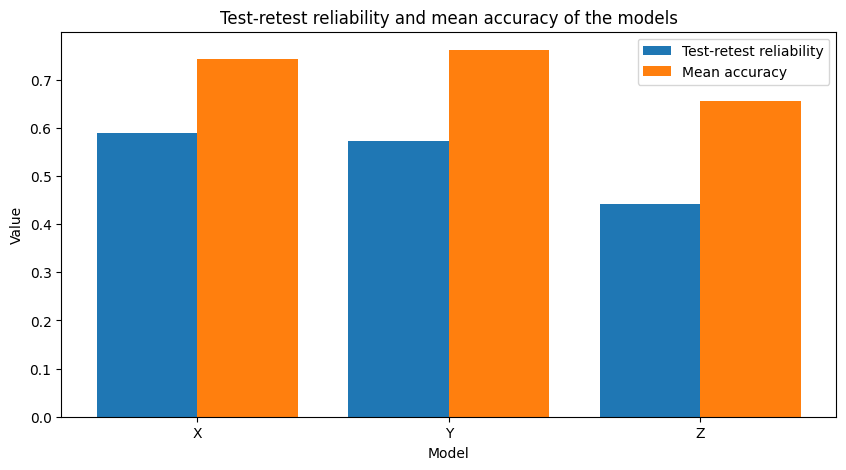

In [34]:
# M is 1 in our case for we have one shuffle and the original

# load the shuffled data and merge it with the unshuffled (original) data 
# resulting in a df with the c_0 being collumn 'correct_original' and c_1 being collumn 'correct_shuffled'
df_mmlu_shuffled = pd.read_csv('./task_2_5/lm_scores_mmlu_shuffle.csv')
merged_df = pd.merge(
    df_mmlu[['question_id', 'model_name', 'correct']],
    df_mmlu_shuffled[['question_id', 'model_name', 'correct']],
    on=['question_id', 'model_name'],
    suffixes=('_original', '_shuffled')
)
#grouping by model 
df_x = merged_df[merged_df['model_name'] == 'X']
df_y = merged_df[merged_df['model_name'] == 'Y']
df_z = merged_df[merged_df['model_name'] == 'Z']
# calculating the test-retest metric (the mean of c_0 * c_1) and the mean accuracy of the original data
t_x = (df_x['correct_original']*df_x['correct_shuffled']).mean()
t_y = (df_y['correct_original']*df_y['correct_shuffled']).mean()
t_z = (df_z['correct_original']*df_z['correct_shuffled']).mean()
m_x = df_x['correct_original'].mean()
m_y = df_y['correct_original'].mean()
m_z = df_z['correct_original'].mean()


plt.figure(figsize=(10, 5))
plt.bar(['X', 'Y', 'Z'], [t_x, t_y, t_z], label='Test-retest reliability', width=-0.4, align='edge')
plt.bar(['X', 'Y', 'Z'], [m_x, m_y, m_z], label='Mean accuracy', width=0.4, align='edge')
plt.ylabel('Value')
plt.xlabel('Model')
plt.title('Test-retest reliability and mean accuracy of the models')
plt.legend()
plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again that sweet, sweet knowledge] Could you think of a plausible explanation?

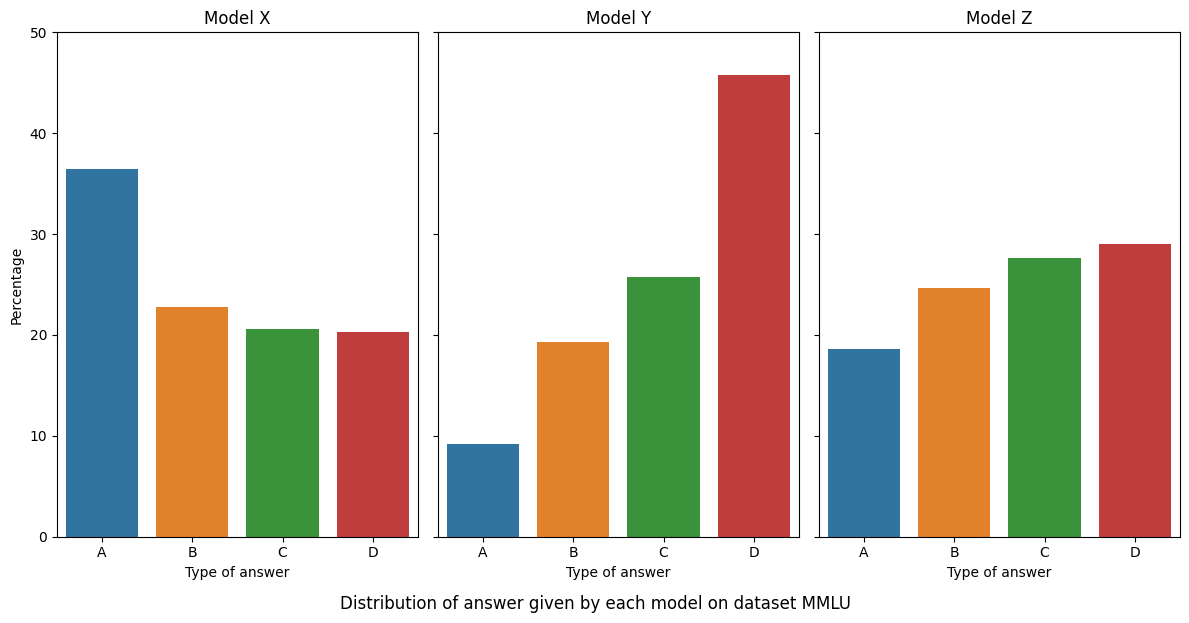

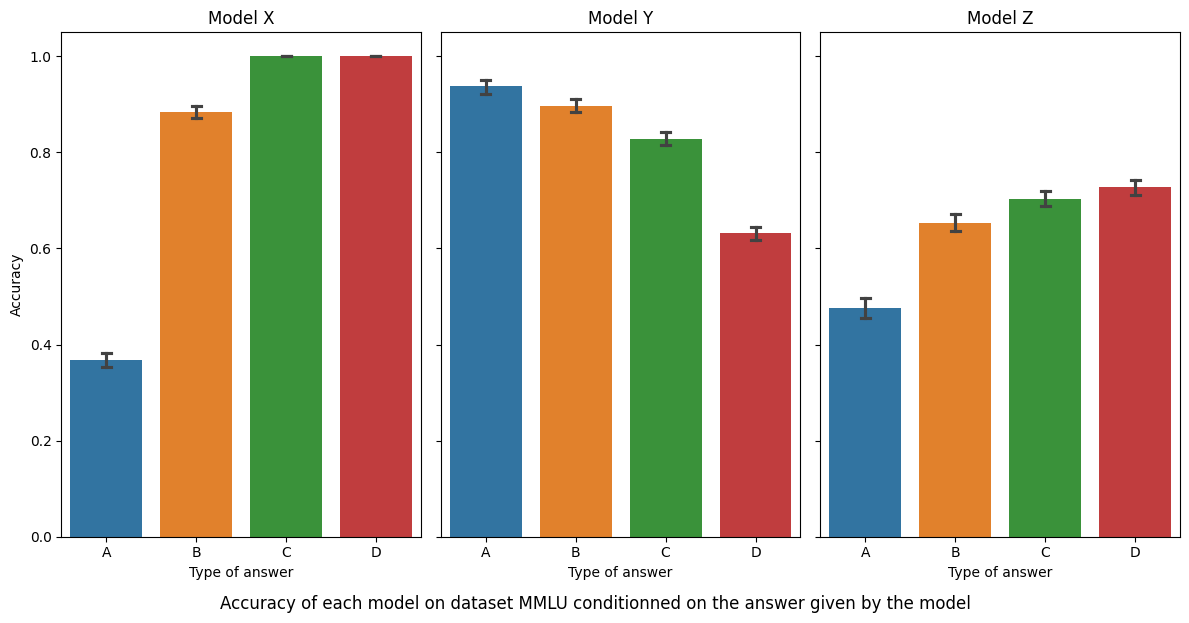

In [35]:
# A
# initiate the plot
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
for ax in axes:
    ax.set_ylim(0, 50)
custom_palette = {"A": "#1f77b4", "B": "#ff7f0e", "C": "#2ca02c", "D": "#d62728"}

# grouping the data by model X,Y,Z
df_mmlu_x = df_mmlu[df_mmlu['model_name']=='X']
df_mmlu_y = df_mmlu[df_mmlu['model_name']=='Y']
df_mmlu_z = df_mmlu[df_mmlu['model_name']=='Z']

# we use seaborn.countplot to plot each distribution
sns.countplot(x="result", hue="result", data=df_mmlu_x, ax=axes[0],order=['A','B','C','D'], palette=custom_palette,stat = 'percent')
axes[0].set_title("Model X")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Type of answer")
sns.countplot(x="result", hue="result", data=df_mmlu_y, ax=axes[1],order=['A','B','C','D'], palette=custom_palette,stat = 'percent')
axes[1].set_title("Model Y")
axes[1].set_ylabel("Percentage ")
axes[1].set_xlabel("Type of answer")
sns.countplot(x="result", hue="result", data=df_mmlu_z, ax=axes[2],order=['A','B','C','D'], palette=custom_palette,stat = 'percent')
axes[2].set_title("Model Z")
axes[2].set_ylabel("Percentage ")
axes[2].set_xlabel("Type of answer")

plt.tight_layout()
fig.suptitle("Distribution of answer given by each model on dataset MMLU", y = 0)
plt.show()

# Accuracy --------------------------------------------------------------------------------------------
# initiate the plot
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
for ax in axes:
    ax.set_ylim(0, 1.05)
custom_palette = {"A": "#1f77b4", "B": "#ff7f0e", "C": "#2ca02c", "D": "#d62728"}

# we plot the accuracy of each model using seaborn.barplot
sns.barplot(x="result", y="correct", hue="result", data=df_mmlu_x, ax=axes[0],order=['A','B','C','D'], palette=custom_palette,capsize=0.1)
axes[0].set_title("Model X")
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Type of answer")
sns.barplot(x="result", y="correct", hue="result", data=df_mmlu_y, ax=axes[1],order=['A','B','C','D'], palette=custom_palette,capsize=0.1)
axes[1].set_title("Model Y")
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Type of answer")
sns.barplot(x="result", y="correct", hue="result", data=df_mmlu_z, ax=axes[2],order=['A','B','C','D'], palette=custom_palette,capsize=0.1)
axes[2].set_title("Model Z")
axes[2].set_ylabel("Accuracy")
axes[2].set_xlabel("Type of answer")

plt.tight_layout()
fig.suptitle("Accuracy of each model on dataset MMLU conditionned on the answer given by the model", y = 0)
plt.show()

B. /Discuss:/

Model X shows a bias towards answer A, i.e. it answers often with A which explains the high amount of A answers and the low accuracy on A. Answer A seems to be the default answer of Model X. It chooses A when it is unsure and thus guess A wrong a lot, but it hence anwers with B,C,D with a higher accuracy. Y behaves analogously.
Model Z shows a bigger confidence intervall than the other Models due to its lower accuracy.
Z's answers (unlike with X and Y) seem directly correlated with its accuracy.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [36]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


/Users/madeleine/Desktop/EPFL/ADA/Github/ADA_2024/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

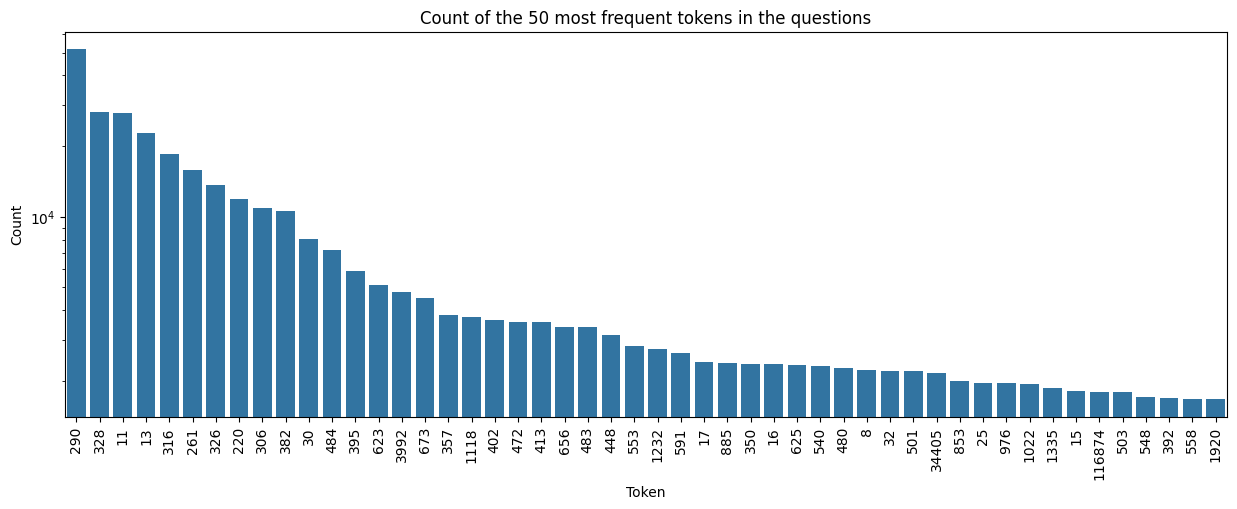

In [37]:
# A

#Tokenizing the questions in the test dataset
tokens = df_test['question'].apply(tokenize_text)
t = tokens.explode().value_counts().head(50)

#Plotting the 50 most frequent tokens
plt.figure(figsize=(15, 5))
sns.barplot(x=t.index, y=t.values,order=t.index,)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Count of the 50 most frequent tokens in the questions')
plt.xlabel('Token')
plt.ylabel('Count')
plt.show()


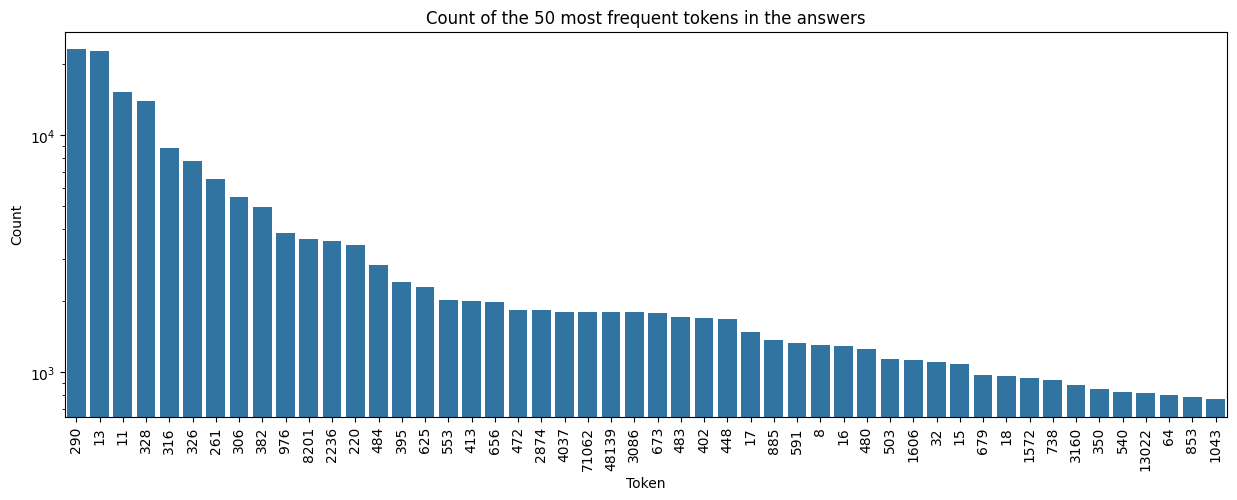

In [38]:
# B

#Tokenizing the answers in the test dataset
tokens_answers = pd.concat([df_test['A'], df_test['B'], df_test['C'], df_test['D']]).apply(tokenize_text)
t_answers = tokens_answers.explode().value_counts().head(50)

#Plotting the 50 most frequent tokens
plt.figure(figsize=(15, 5))
sns.barplot(x=t_answers.index, y=t_answers.values,order=t_answers.index,)
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Count of the 50 most frequent tokens in the answers')
plt.xlabel('Token')
plt.ylabel('Count')
plt.show()

In [39]:
# C

# Identifying the token for A,B,C and D
token_A = tokenize_text("A")[0]
token_B = tokenize_text("B")[0]
token_C = tokenize_text("C")[0]
token_D = tokenize_text("D")[0]

#Counting the number of times each token appears in the test dataset
tokens = pd.concat([df_test['A'], df_test['B'], df_test['C'], df_test['D'],df_test['question']]).apply(tokenize_text)
nb_A = tokens.explode().value_counts().get(token_A, 0)
nb_B = tokens.explode().value_counts().get(token_B, 0)
nb_C = tokens.explode().value_counts().get(token_C, 0)
nb_D = tokens.explode().value_counts().get(token_D, 0)

nb_tot = nb_A + nb_B + nb_C + nb_D

#Printing the relative distribution of each token
print("Relative distribution of A: ",nb_A/nb_tot)
print("Relative distribution of B: ",nb_B/nb_tot)
print("Relative distribution of C: ",nb_C/nb_tot)
print("Relative distribution of D: ",nb_D/nb_tot)



Relative distribution of A:  0.7916865742952699
Relative distribution of B:  0.06020066889632107
Relative distribution of C:  0.10152890587673197
Relative distribution of D:  0.046583850931677016


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


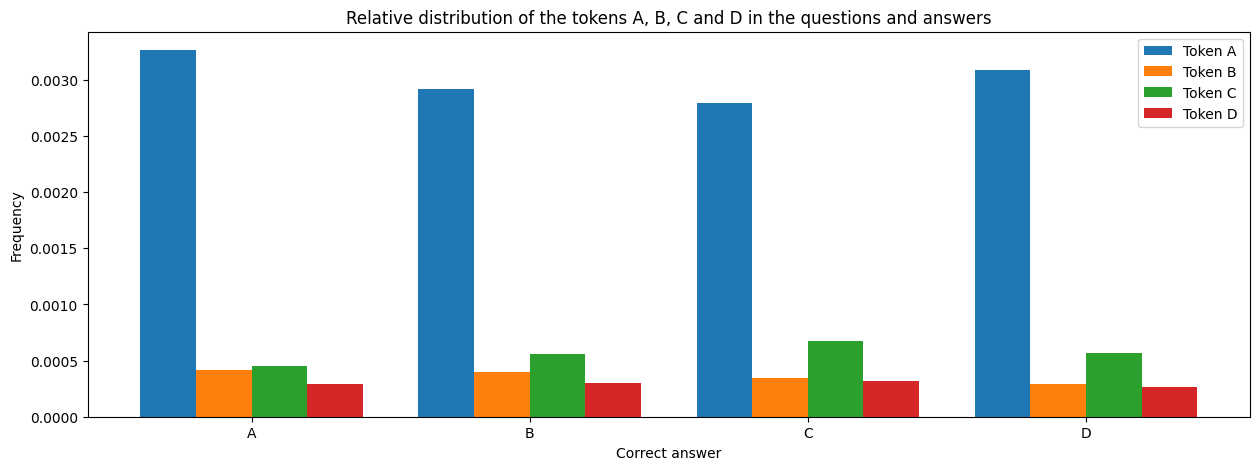

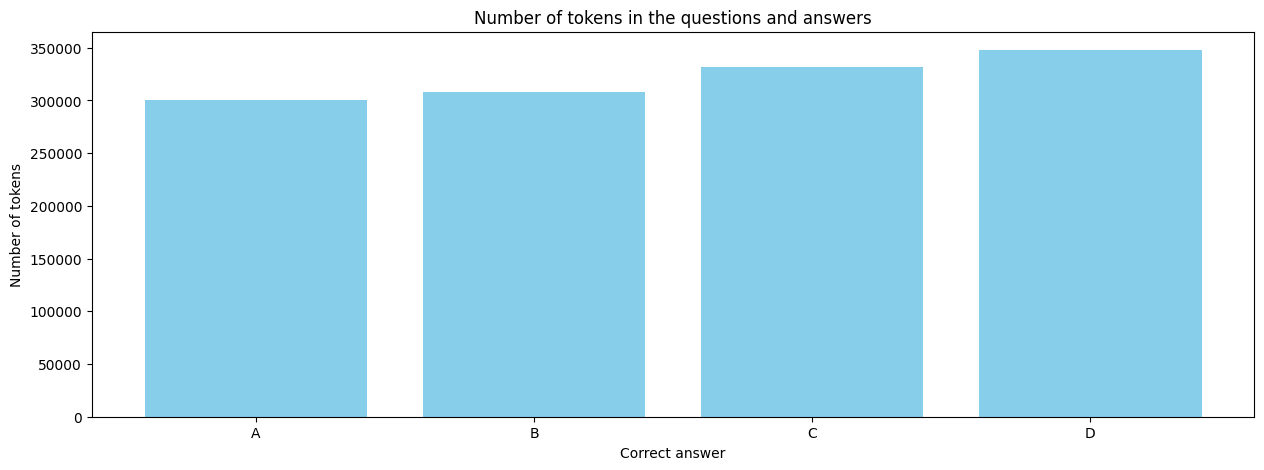

In [45]:
# A


df_test_2 = df_test[['question_id', 'question', 'A', 'B', 'C', 'D', 'answer']].copy()
df_test_2 = df_test_2.drop_duplicates()


group_correct = {'A' : [0,0,0,0,0,0], 'B' : [0,0,0,0,0,0], 'C' : [0,0,0,0,0,0], 'D' : [0,0,0,0,0,0]}

# For each combined question and answer:
for i, question in enumerate(df_test_2['question']):
    
    # Tokenize the question and answers
    tokens = tokenize_text(df_test_2['question'][i])+tokenize_text(df_test_2['A'][i])+tokenize_text(df_test_2['B'][i])+tokenize_text(df_test_2['C'][i])+tokenize_text(df_test_2['D'][i])
    
    # Count the number of each token and the total number of tokens
    nb_total = len(tokens)
    nb_A = tokens.count(token_A)
    nb_B = tokens.count(token_B)
    nb_C = tokens.count(token_C)
    nb_D = tokens.count(token_D)

    # Group by the correct answer and compute the frequency of each token
    correct_answer = df_test_2['answer'][i]
    group_correct[correct_answer][0]+=nb_A/nb_total
    group_correct[correct_answer][1]+=nb_B/nb_total
    group_correct[correct_answer][2]+=nb_C/nb_total
    group_correct[correct_answer][3]+=nb_D/nb_total
    group_correct[correct_answer][4]+=nb_total
    group_correct[correct_answer][5]+=1

# Compute the mean frequency of each token for each correct answer
for key in group_correct.keys():
    group_correct[key][0] = group_correct[key][0]/group_correct[key][5]
    group_correct[key][1] = group_correct[key][1]/group_correct[key][5]
    group_correct[key][2] = group_correct[key][2]/group_correct[key][5]
    group_correct[key][3] = group_correct[key][3]/group_correct[key][5]

#Plot the mean frequency of each token for each correct answer
plt.figure(figsize=(15, 5))
categories = ['A', 'B', 'C', 'D']
values = np.array([group_correct['A'], group_correct['B'], group_correct['C'], group_correct['D']])
width = 0.2
x = np.arange(len(categories))

plt.bar(x - 1.5 * width, values[:, 0], width, label='Token A')
plt.bar(x - 0.5 * width, values[:, 1], width, label='Token B')
plt.bar(x + 0.5 * width, values[:, 2], width, label='Token C')
plt.bar(x + 1.5 * width, values[:, 3], width, label='Token D')

plt.ylabel('Frequency')
plt.xlabel('Correct answer')
plt.xticks(x, categories)
plt.title('Relative distribution of the tokens A, B, C and D in the questions and answers')
plt.legend()
plt.show()

#Plot the number of tokens in the questions and answers for each correct answer
plt.figure(figsize=(15, 5))
categories = ['A', 'B', 'C', 'D']
plt.bar(categories, [group_correct['A'][4], group_correct['B'][4], group_correct['C'][4], group_correct['D'][4]] , color='skyblue')
plt.ylabel('Number of tokens')
plt.xlabel('Correct answer')
plt.title('Number of tokens in the questions and answers')
plt.show()


B. /Discuss:/ It is not likely that the frequency of tokens A,B,C and D have an influence on the answer, as the distributions seems quietly similar across the correct answers. For instance, token A is consistently overrepresented with similar mean frequencies in all cases. Moreover even if we observe a small slight increase in the frequency of token A for correct answer A and token C for correct answer C, these differences in mean frequency are minimal and unlikely to significantly impact the models when analyzing individual questions and answers.

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [41]:
# A

# Copies the relevant columns into a new df
df_test3 = df_test[['question', 'A', 'B', 'C', 'D', 'subject']].copy()

# Count the amount of tokens in all cells for all questions and answers
df_test3[['question', 'A', 'B', 'C', 'D']] = df_test3[['question', 'A', 'B', 'C', 'D']
                                                      ].applymap(tokenize_text).applymap(len)

# Keeping only the subjects that at atleast once have a question or an answer of more than 300 tokens
subjects = df_test3[(df_test3['question'] > 300)+
                    (df_test3['A'] > 300)+
                    (df_test3['B'] > 300)+
                    (df_test3['C'] > 300)+
                    (df_test3['D'] > 300) >= 1]['subject'].drop_duplicates()

# Prints the potentially problematic subject
print("Subjects that might be problematic: \n", subjects.to_string(index=False))

/var/folders/8v/6ntcwp3d6lg5ss9rkzyvsxrr0000gn/T/ipykernel_69101/3576167262.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test3[['question', 'A', 'B', 'C', 'D']] = df_test3[['question', 'A', 'B', 'C', 'D']


Subjects that might be problematic: 
             college medicine
high school european history
      high school us history
   high school world history
            professional law
       professional medicine


B. /Dicsuss:/ We could use different type of LLM's depending on the length of the context. We would use turbo when a question and its answer are small ( under 300 tokens ), and we would use a model between X,Y or Z for the large questions / answers.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1.  **Speed/power trade-off** \
\
    We saw that faster and cheaper LMs can have problems in areas where larger amounts of tokens are considered. 

2. **False sense of confidence** \
\
    Some models may draw connections that are extremely irrelevant, yet still be really confident about the answer. See the example when model X seems to connect the frequency of the token "A" to the answer "A" in multiple choice.

3. **Badly represented data**\
\
    The models are dependent on data, therefore, the quality of the data matters. One example is the balance of the data, if the data is unbalanced then the model might be cunning towards some areas and neclecting areas that were not as prominent in the data.

4. TODO: 

TODO: Perhaps rewrite the first 3 bullet-points, or just write more